In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

where = '/home/ilmoncyte/Documents/analyses/'
output_folder = where+ 'testing_data/out_results/single_cell_cleaned/'

def imp_merge(one, two):
    one_dat = pd.read_csv(output_folder + one)
    two_dat = pd.read_csv(output_folder + two)
    combined = pd.concat([one_dat, two_dat], axis=0, ignore_index=True)
    return combined

       
    
    

   Unnamed: 0      Metadata_Filename  cell_area  DiIOrg    IntDiI   MeanDiI  \
0           0  r03c03f1-ch2_MIP.tiff     1053.0     0.0  5.323644  0.005056   
1           1  r03c03f1-ch2_MIP.tiff     1356.0     0.0  3.435065  0.002533   

     MedDiI  Size_DiIOrg  MeanIntDiI_DiIOrg  MeanMeanDiI_DiIOrg  \
0  0.002441          NaN                NaN                 NaN   
1  0.002045          NaN                NaN                 NaN   

   MeanMedDiI_DiIOrg  experiment  um_cell_area  Monocyte shortnames    well  \
0                NaN  ME00028_P7     23.532924  negative     r03c03  r03c03   
1                NaN  ME00028_P7     30.304506  negative     r03c03  r03c03   

  Sample treatment DiIOrg_pos  um_DiIOrg_size  total_DiIOrg_size  \
0  A0001     NAIVE   negative             NaN                NaN   
1  A0001     NAIVE   negative             NaN                NaN   

   um_total_DiIOrg_size  total_DiI_meanint_of_DiIOrg  \
0                   NaN                          NaN   
1    

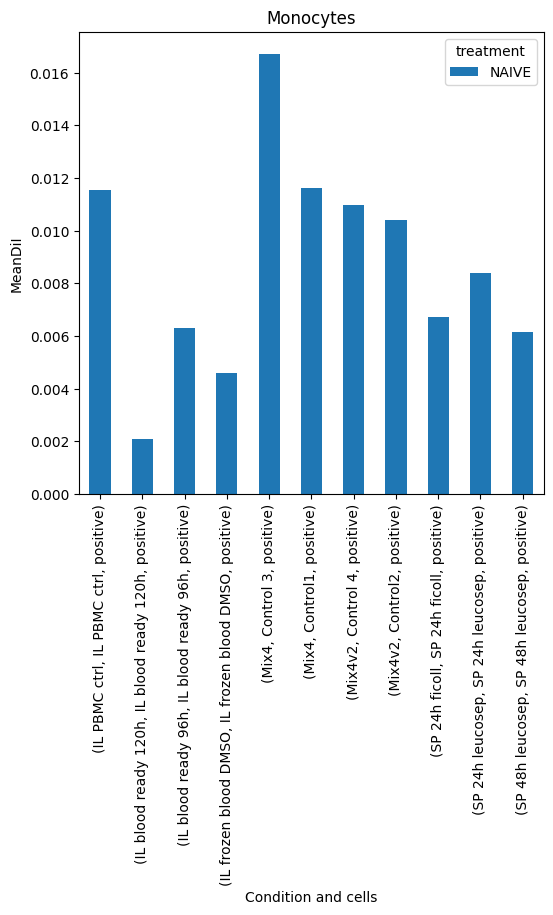

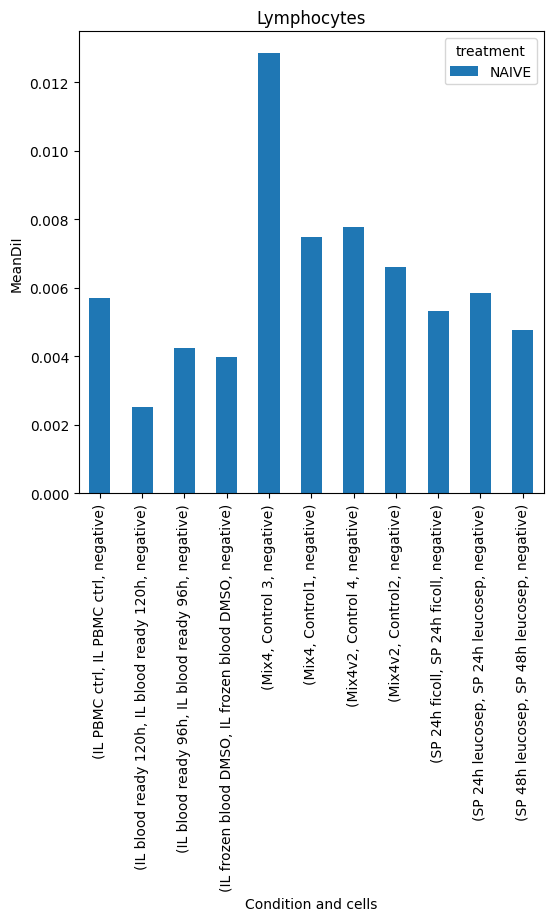

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import pandas as pd

one = 'ME00028_P7_cell_clean.csv'
two = 'ME00028_P8_cell_clean.csv'

graph_folder = where+ 'testing_data/out_results/graphs/'
labels_folder = where + 'testing_data/description_files/'
#print(name)

# this function is reading the two csv files and adding them to one large dataframe. 
data = imp_merge(one,two)
#looking at the data frame head whether it contains data
print(data.head(2))

# this loads the labels to a dataframe 
labels = pd.read_csv(labels_folder + 'ME00028_P1_P8.csv')
#prints the labels to check whether they are correctly loaded 
print(labels)

#this merges the labels with the "data" dataframe adding columns with additional information
data = pd.merge(data, labels, on = 'Sample')
#print(data.head(2))

grouped_reads = data.groupby(['experiment','Label','Description', 'Monocyte', 'treatment']).agg({
    'MeanDiI': 'mean',
    'DiIOrg': 'mean', 
    'um_DiIOrg_size': 'mean',
    'um_total_DiIOrg_size': 'mean'})

#print(grouped_reads)

grouped_reads = grouped_reads.reset_index()
#print(grouped_reads.head(2))

two_exp_mean = grouped_reads.groupby(['Label','Description', 'Monocyte', 'treatment']).agg({
    'MeanDiI': ['mean', 'std'],
    'DiIOrg': ['mean', 'std'], 
    'um_DiIOrg_size': ['mean', 'std'],
    'um_total_DiIOrg_size': ['mean', 'std']})

print(two_exp_mean)

Monocytes_two_exps = two_exp_mean.loc[(slice(None), slice(None), 'positive'), ('MeanDiI', 'mean')]
Lymphocytes_two_exps = two_exp_mean.loc[(slice(None), slice(None), 'negative'), ('MeanDiI', 'mean')]
print(Monocytes_two_exps )

import matplotlib.pyplot as plt

#making the figure/graph
fig1, ax1 = plt.subplots(figsize=(6, 6))
# Plot a bar chart
Monocytes_two_exps.unstack().plot(kind='bar', ax = ax1)
ax1.set_title('Monocytes')
ax1.set_xlabel('Condition and cells')
ax1.set_ylabel('MeanDiI')
plt.savefig(graph_folder + "graphnaive.pdf")
# Display the plot
plt.show()

fig2, ax2 = plt.subplots(figsize=(6, 6))
# Plot a bar chart
Lymphocytes_two_exps.unstack().plot(kind='bar', ax = ax2)
ax2.set_title('Lymphocytes')
ax2.set_xlabel('Condition and cells')
ax2.set_ylabel('MeanDiI')
# Display the plot
plt.show()



